<a href="https://colab.research.google.com/github/hongsamhc2/AutoTradingSystem/blob/master/%EC%A1%B0%ED%9B%88%EC%B0%BD/ML_Stock_Data_Analysis_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_csv('/content/drive/My Drive/datasets/stock/DA000020.csv')

In [102]:
# API 에서 받은 데이터는 최신 날짜 기준으로 정렬 되어 있습니다.
df.head()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
0,20201016,0,22750,22950,20750,21550,-1200,907694,19455000000,600960,297637,27931000,601923000000,866103,3.10,100.0,-58544,0,0.0,0,0.0,0.0,53
1,20201015,0,23850,23850,22450,22750,-1100,508031,11652000000,312005,182085,27931000,635430000000,866103,3.10,100.0,329,0,0.0,0,0.0,0.0,53
2,20201014,0,23900,24200,23600,23850,-450,420287,10026000000,231880,180627,27931000,666154000000,882497,3.16,100.0,-2785,0,0.0,0,0.0,0.0,53
3,20201013,0,24200,24550,23900,24300,300,426678,10342000000,226866,185194,27931000,678723000000,872813,3.12,100.0,-2650,0,0.0,0,0.0,0.0,50
4,20201012,0,24500,24950,22950,24000,-150,540131,13039000000,345599,186894,27931000,670344000000,873556,3.13,100.0,1022,0,0.0,0,0.0,0.0,53


In [103]:
# 과거 데이터부터 정렬

df.sort_values(by='date',ascending=True,inplace=True)
df.head()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
10945,19800104,0,4700,4700,4700,4700,3650,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10944,19800105,0,4700,4700,4700,4700,0,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10943,19800107,0,4990,4990,4990,4990,290,120,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10942,19800108,0,5290,5290,5290,5290,300,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10941,19800109,0,5700,5740,5700,5700,410,190,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32


In [104]:
# 날짜 컬럼 데이터 타입 변경 => datetime

df['date'] = df['date'].astype('str')
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10946 entries, 10945 to 0
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           10946 non-null  datetime64[ns]
 1   time           10946 non-null  int64         
 2   open           10946 non-null  int64         
 3   high           10946 non-null  int64         
 4   low            10946 non-null  int64         
 5   close          10946 non-null  int64         
 6   prev           10946 non-null  int64         
 7   volume         10946 non-null  int64         
 8   tr_amount      10946 non-null  int64         
 9   sales_qu       10946 non-null  int64         
 10  purchase_qu    10946 non-null  int64         
 11  li_share       10946 non-null  int64         
 12  market_cap     10946 non-null  int64         
 13  fr_cu_holding  10946 non-null  int64         
 14  fr_cu_ratio    10946 non-null  float64       
 15  ad_pr_ratio    1094

In [105]:
# 데이터프레임 index로 날짜 칼럼을 지정

df.set_index(df['date'], inplace=True)
df.head()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
date,,,,,,,,,,,,,,,,,,,,,,,
1980-01-04,1980-01-04,0,4700,4700,4700,4700,3650,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-05,1980-01-05,0,4700,4700,4700,4700,0,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-07,1980-01-07,0,4990,4990,4990,4990,290,120,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-08,1980-01-08,0,5290,5290,5290,5290,300,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-09,1980-01-09,0,5700,5740,5700,5700,410,190,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32


In [106]:
# 최근 100일 데이터

df_len = len(df)
df_100_start = len(df)-100
df_100 = df.iloc[df_100_start:]
df_100

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
date,,,,,,,,,,,,,,,,,,,,,,,
2020-05-25,2020-05-25,0,10250,10450,10000,10300,50,453897,4627000000,264776,186377,27931000,287689000000,1588867,5.69,100.0,-8268,0,0.0,0,0.0,0.0,50
2020-05-26,2020-05-26,0,10400,10400,10050,10150,-150,250626,2544000000,140959,99630,27931000,283499000000,1567254,5.61,100.0,1806,0,0.0,0,0.0,0.0,53
2020-05-27,2020-05-27,0,10650,12450,10600,11300,1150,6795894,78614000000,3354240,3410512,27931000,315620000000,1451366,5.20,100.0,10245,0,0.0,0,0.0,0.0,50
2020-05-28,2020-05-28,0,11350,11350,10450,10800,-500,1106251,12063000000,665363,425516,27931000,301654000000,1472470,5.27,100.0,4757,0,0.0,0,0.0,0.0,53
2020-05-29,2020-05-29,0,10900,12150,10850,11550,750,4470917,51931000000,2127166,2311691,27931000,322603000000,1475601,5.28,100.0,34080,0,0.0,0,0.0,0.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-12,2020-10-12,0,24500,24950,22950,24000,-150,540131,13039000000,345599,186894,27931000,670344000000,873556,3.13,100.0,1022,0,0.0,0,0.0,0.0,53
2020-10-13,2020-10-13,0,24200,24550,23900,24300,300,426678,10342000000,226866,185194,27931000,678723000000,872813,3.12,100.0,-2650,0,0.0,0,0.0,0.0,50
2020-10-14,2020-10-14,0,23900,24200,23600,23850,-450,420287,10026000000,231880,180627,27931000,666154000000,882497,3.16,100.0,-2785,0,0.0,0,0.0,0.0,53


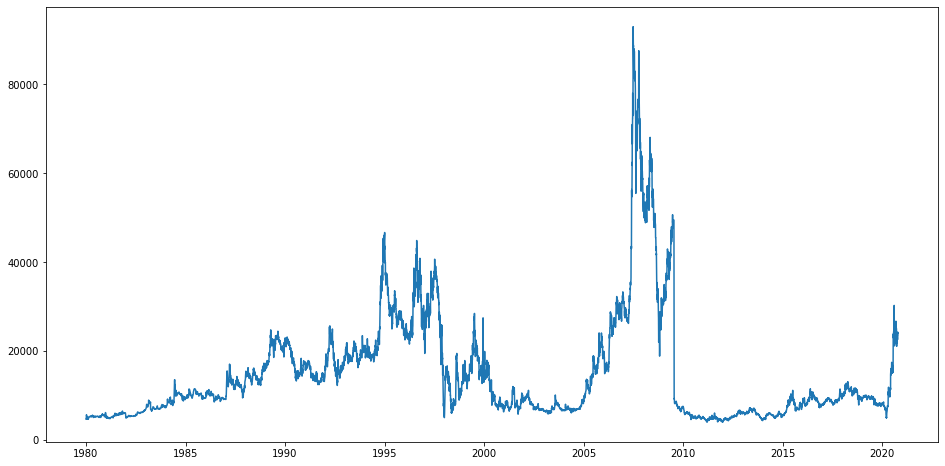

In [117]:
# 최근 100일 데이터 종가 라인 그래프
df.index.astype('str')
plt.figure(figsize=(16,8))

plt.plot(df.index,df['close'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


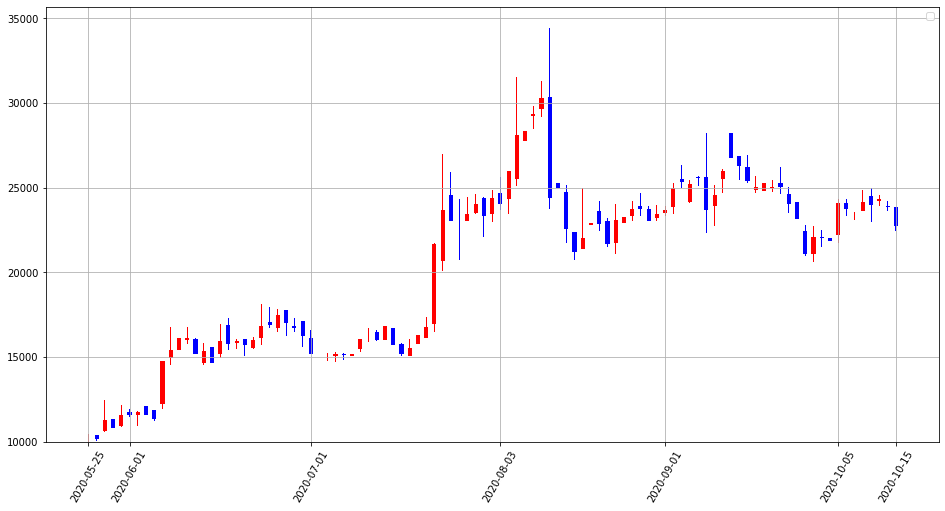

In [118]:
# 최근 100일 봉차트 그리기

# 1. 시가와 종가의 차이 데이터 
df['diff'] = df['close'] - df['open']

# 2. color
df['color'] ='blue'
for i in range(len(df)):
  if df['diff'].iloc[i] >= 0:
    df['color'].iloc[i] = 'red'
  else:
    df['color'].iloc[i] ='blue'
df[['diff','color']].tail()
# 3. 날짜 1일 리스트 만들기
def first_day_list(df):
  date = []
  date.append(df['date'].iloc[0])
  for i in range(len(df)-1):
    date_cu = df['date'].iloc[i]
    date_cu = date_cu.split('-')
    date_ne = df['date'].iloc[i+1]
    date_ne = date_ne.split('-')
    if date_cu[1] != date_ne[1]:
      date.append('-'.join(date_ne))
  if df['date'].iloc[-1] not in date:
    date.append(df['date'].iloc[-1])
  return date

# 4. barchart

df_100 = df.iloc[df_100_start:]
df_100['date'] = df_100['date'].astype('str')
first_day_list = first_day_list(df_100)
plt.figure(figsize=(16,8))
plt.bar(df_100['date'],df_100['diff'],width = 0.5,bottom= df_100['open'],color=df_100['color'])
plt.bar(df_100['date'],df_100['high']-df_100['low'],width=0.1,bottom = df_100['low'],color=df_100['color'])
plt.xticks(first_day_list,rotation = '60')
plt.grid()
plt.legend()

In [119]:
# label 컬럼 생성 => 다음날 종가 

df['label'] = df['close'].shift(-1)

df[['close','label']]

,close,label
date,,
1980-01-04,4700,4700.0
1980-01-05,4700,4990.0
1980-01-07,4990,5290.0
1980-01-08,5290,5700.0
1980-01-09,5700,5700.0
...,...,...
2020-10-08,24150,24000.0
2020-10-12,24000,24300.0
2020-10-13,24300,23850.0


In [120]:
# 결측치 값있는 행 삭제

df.dropna(inplace=True)
df.tail()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign,diff,color,label
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-07,2020-10-07,0,23500,23550,23100,23500,-250,322425,7531000000,178073,136676,27931000,656378000000,913076,3.27,100.0,1528,0,0.0,0,0.0,0.0,53,0,red,24150.0
2020-10-08,2020-10-08,0,23600,24850,23600,24150,650,716608,17399000000,312273,383482,27931000,674533000000,910980,3.26,100.0,6024,0,0.0,0,0.0,0.0,50,550,red,24000.0
2020-10-12,2020-10-12,0,24500,24950,22950,24000,-150,540131,13039000000,345599,186894,27931000,670344000000,873556,3.13,100.0,1022,0,0.0,0,0.0,0.0,53,-500,blue,24300.0
2020-10-13,2020-10-13,0,24200,24550,23900,24300,300,426678,10342000000,226866,185194,27931000,678723000000,872813,3.12,100.0,-2650,0,0.0,0,0.0,0.0,50,100,red,23850.0
2020-10-14,2020-10-14,0,23900,24200,23600,23850,-450,420287,10026000000,231880,180627,27931000,666154000000,882497,3.16,100.0,-2785,0,0.0,0,0.0,0.0,53,-50,blue,22750.0


In [121]:
# feature 와 label 데이터셋 생성  / feature 데이터는 종가 
y_label = df['label'].copy()
X_feature = df['close'].copy()

print('y_label Shape : \n' , y_label.shape)
print('X_feature Shape : \n', X_feature.shape)

y_label Shape : 
 (10944,)
X_feature Shape : 
 (10944,)


In [122]:
# X_featrue 를 2차원 배열로 변경

X_feature = X_feature.values.reshape(-1,1)


In [123]:
print(X_feature.shape)

(10944, 1)


In [124]:
# 훈련 / 테스트 셋으로 분리

from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X_feature,y_label, train_size = 0.8, shuffle = False)